## Documento para creación de ploteos para documento de conclusiones de ensayos dinámicos
* Autor: Gustavo Vladimir Diaz
* Fecha inicio: 12/3/2020
* Fecha última modificación: 12/3/2020

### Objetivo
Crear ploteos necesarios para entendimiento de conclusiones

#### Ploteos necesarios
1. Conclusión "Adquisición con sensor óptico": Comparación entre ruido de ploteo de datos recogidos en sensor óptico y comparado con datos obtenidos en sensor inductivo
2. Conclusión "Adquisición con osciloscopio": Mostrar que el tiempo de adquisición mientras mas largo es mayor resolución en frecuencia se va a tener, comparar uno que tenga adquisición de 6 segundos con alguno de 0.6 segundos
3. **Conclusión "Frecuencia fundamental": Mostrar algún ensayos cuya fundamental se observe plenamente**
4. Conclusión "Dispersión de fundamentales": Mostrar como por ejemplo en el ensayo 20 se observa como la fundamental tiene un corrimiento en frecuencia y no la energía concentrada en una frecuencia.
5. Conclusión "Repetibilidad de ensayos": Mostrar como en el documento "Resultado 6" los distintos espectros como varían para un mismo rotor

8191
8171 0
Freq step 0.41768639227847015 Max freq 1706.6665988498291 Freq bins 4086


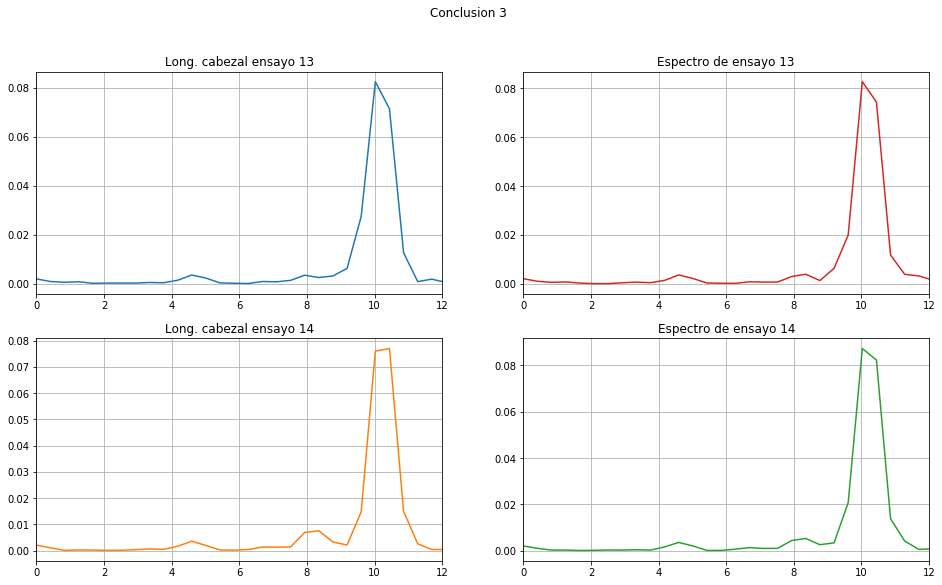

In [1]:
# Conclusión "Adquisición con sensor óptico":
%matplotlib inline

# Conclusión "Adquisición con sensor óptico":
import numpy as np
import matplotlib.pyplot as plt

# Definición de nombre de ensayo a levantar

direccion = 'Registro osciloscopio' + '/'
direccion_salida = 'Conclusiones' + '/'
nombre_1 = 'Ensayo s_alim 10'
nombre_2 = 'Ensayo s_alim 12'
nombre_3 = 'Ensayo s_alim 14'
nombre_4 = 'Ensayo s_alim 16'
canal_1 = 'CH1'
canal_2 = 'CH2'
extension = '.npz'
extension_salida = 'png'
nombre_salida = 'Conclusion 3'

archivo_1 = direccion + nombre_1 + ' ' + canal_1 + extension
archivo_2 = direccion + nombre_2 + ' ' + canal_1 + extension
archivo_3 = direccion + nombre_3 + ' ' + canal_1 + extension
archivo_4 = direccion + nombre_4 + ' ' + canal_1 + extension
archivo_salida = direccion_salida + nombre_salida + '.' + extension_salida

def guardar_plot( tension, tiempo, title=None ):
    """Create a file with data."""
    title = title + '.npz'
    np.savez( title, x=tiempo, y=tension)

with np.load(archivo_1) as archivo:
    time_V1 = archivo['x']
    V1 = archivo['y']

with np.load(archivo_2) as archivo:
    time_V2 = archivo['x']
    V2 = archivo['y']

with np.load(archivo_3) as archivo:
    time_V3 = archivo['x']
    V3= archivo['y']

with np.load(archivo_4) as archivo:
    time_V4 = archivo['x']
    V4 = archivo['y']
    
def fourier_spectrum( nsamples, data, deltat, logdb, power, rms ):
    """Given nsamples of real voltage data spaced deltat seconds apart,
    find the spectrum of the data (its frequency components). If logdb,
    return in dBV, otherwise linear volts. If power, return the power
    spectrum, otherwise the amplitude spectrum. If rms, use RMS volts,
    otherwise use peak-peak volts. Also return the number of frequency
    samples, the frequency sample spacing and maximum frequency. Note:
    The results from this agree pretty much with my HP 3582A FFT
    Spectrum Analyzer,
          although that has higher dynamic range than the 8 bit scope."""
    data_freq = np.fft.rfft(data * np.hanning( nsamples ))
    nfreqs = data_freq.size
    data_freq = data_freq / nfreqs
    ascale = 4
    if( rms ):
        ascale = ascale / ( 2 * np.sqrt(2) )
    if( power ):
        spectrum = ( ascale * absolute(data_freq) )**2
        if( logdb ):
            spectrum = 10.0 * np.log10( spectrum )
    else:
        spectrum = ascale * np.absolute(data_freq)
        if( logdb ):
            spectrum = 20.0 * log10( spectrum )
    freq_step = 1.0 / (deltat * 2 * nfreqs);
    max_freq = nfreqs * freq_step
    return( nfreqs, freq_step, max_freq, spectrum )

def freq_plot( nfreqs, spectrum, freq_step, max_freq, title=None, logdb=False, 
               fmin=0.0, fmax=10000.0, ylo=-60.0, yhi=0.0 ):
    """Create an amplitude versus frequncy plot for data analysed with
    fourier_spectrum()."""
    freqs = np.arange( 0, max_freq, freq_step )
    plt.xlim( fmin, fmax )
    plt.plot( freqs, spectrum )
    if( title == None ):
        if( logdb ):
            plt.title( 'Frequency domain. Log RMS Volts.' )
        else:
            plt.title( 'Frequency domain. Linear RMS Volts.' )
    else:
        plt.title( title )
    plt.xlabel( 'Freq (Hz)' )
    if( logdb ):
        plt.ylabel( 'dBV RMS' )
        plt.ylim( -60, 0 )
    else:
        plt.ylabel( 'Volts RMS' )
    plt.grid( True )
    plt.show()

# Recortador de la imagen

ini_cut = np.empty(1)

ini_cut = 0

fin_cut = np.empty(1)

fin_cut = V1.size - 20

print (V1.size)

print (fin_cut,ini_cut)

V1_cort = V1[ ini_cut: fin_cut]
time_V1_cort = time_V1[ ini_cut: fin_cut ]

V2_cort = V2[ ini_cut: fin_cut]
time_V2_cort = time_V2[ ini_cut: fin_cut ]

V3_cort = V3[ ini_cut: fin_cut]
time_V3_cort = time_V3[ ini_cut: fin_cut ]

V4_cort = V4[ ini_cut: fin_cut]
time_V4_cort = time_V4[ ini_cut: fin_cut ]

# Cálculo de fourier de ambas funciones

## Creación de variables para función fourier_spectrum
    # Para V1
nsamples_V1 = V1_cort.size
deltat_V1 = time_V1_cort[1] - time_V1_cort[0]

    #Para V2

nsamples_V2 = V2_cort.size
deltat_V2 = time_V2_cort[1] - time_V2_cort[0]

    #Para V3

nsamples_V3 = V3_cort.size
deltat_V3 = time_V3_cort[1] - time_V3_cort[0]

    #Para V4

nsamples_V4 = V4_cort.size
deltat_V4 = time_V4_cort[1] - time_V4_cort[0]


## Amplitude spectrum and plot it.

# Cálculo de transformada de fourier para V1
( nfreqs_V1, freq_step_V1, max_freq_V1, spectrum_V1 ) = fourier_spectrum( nsamples_V1, V1_cort, deltat_V1, False, False, True )

# Presentación de datos principales en consola del espectro de V1
print ("Freq step", freq_step_V1, "Max freq", max_freq_V1, "Freq bins",nfreqs_V1)

# Cálcula de transformada de fourier para V2
( nfreqs_V2, freq_step_V2, max_freq_V2, spectrum_V2 ) = fourier_spectrum( nsamples_V2, V2_cort, deltat_V2, False, False, True )

# Cálcula de transformada de fourier para V3
( nfreqs_V3, freq_step_V3, max_freq_V3, spectrum_V3 ) = fourier_spectrum( nsamples_V3, V3_cort, deltat_V3, False, False, True )

# Cálcula de transformada de fourier para V4
( nfreqs_V4, freq_step_V4, max_freq_V4, spectrum_V4 ) = fourier_spectrum( nsamples_V4, V4_cort, deltat_V4, False, False, True )


# Presentación de datos principales en consola del espectro de V2
("Freq step", freq_step_V2, "Max freq", max_freq_V2, "Freq bins", nfreqs_V2)

# Creación de ejes de frecuencia para plotear espectro

freqs_V1 = np.arange( 0, max_freq_V1, freq_step_V1 )
freqs_V2 = np.arange( 0, max_freq_V2, freq_step_V2 )
freqs_V3 = np.arange( 0, max_freq_V3, freq_step_V3 )
freqs_V4 = np.arange( 0, max_freq_V4, freq_step_V4 )

freqs_V1 = freqs_V1[0:spectrum_V1.size]
freqs_V2 = freqs_V2[0:spectrum_V2.size]
freqs_V3 = freqs_V3[0:spectrum_V3.size]
freqs_V4 = freqs_V4[0:spectrum_V4.size]

# Representación en subplot de gráficos como vienen e invertidos

fig, axs = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle(nombre_salida)
axs[0,0].set_xlim( 8, 12 )
axs[0,0].plot(freqs_V1, spectrum_V1, 'tab:blue')
axs[0,0].set_title('Long. cabezal ensayo 13')
axs[0,0].grid(True)
axs[0,1].set_xlim( 8, 12 )
axs[0,1].plot( freqs_V2, spectrum_V2, 'tab:red')
axs[0,1].set_title('Espectro de ensayo 13')
axs[0,1].grid(True)
axs[1,0].set_xlim( 8, 12 )
axs[1,0].plot(freqs_V3, spectrum_V3, 'tab:orange')
axs[1,0].set_title('Long. cabezal ensayo 14')
axs[1,0].grid(True)
axs[1,1].set_xlim( 8, 12 )
axs[1,1].plot( freqs_V4, spectrum_V4, 'tab:green')
axs[1,1].set_title('Espectro de ensayo 14')
axs[1,1].grid(True)

plt.savefig(archivo_salida, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='a4', format=extension_salida, quality= 50)

plt.show()